# 2018 XI year's alumnies university summission prediction due to their IX year final examination results

# IX sinif buraxılış imtahanı nəticələri əsasında 2018-ci il XI məzunlarının ali və orta ixtisas məktəblərinə daxil olub-olmamasının proqnozlaşdırılması

Azərbaycan ümümtəhsil müəssisələri məzunlarının ali və orta ixtisas əktəblərinə qəbulunun proqnozlaşdırılmasını aparmaq üçün eyni məzunların IX sinif buraxılış imtahanlarında göstərdikləri nəticələr ilk beyin hücumu kimi təsirli data hesab oluna bilər. Bu datanın etibarlı olmasını iki əsas amil aktual edir.
1. IX sinif buraxılış imtahanlarının Dövlət İmtahan Mərkəzi tərəfindən (yəni bilavasitə tədris prosesində iştirak etməyən kənar auditor kimi) aparılması
2. Şagirdlərin ali təhsil müəssisələrinə hazırlaşması prosesi daha çox X və XI siniflərə təsadüf etdiyinə görə
Bu iki əsas faktoru nəzərə alaraq 2016-cı il 48740 şagirdin cinsi, təhsil aldığı bölməsi, buraxılış imtahanında Azərbaycan dili və Riyaziyyat fənləri üzrə aldığı qiymətlər əsasında Ali təhsil müəssisələrinə qəbul balı və qəbul olub olmaması proqnoz ediləcəkdir.

İlk əvvəl lazımi Python kitabxanalarını yükləyək

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [96]:
edu = pd.read_excel(r"bakalavr2018.xlsx")

In [97]:
edu.head()

,Finkod,Gender,Sector_Az,Score,Native,Math,Is_Entered
0,7E4PJYQ,Male,Aze,56,2,3,No
1,7LWHYJE,Female,Aze,380,4,4,Yes
2,7E6Z5DT,Male,Aze,87,0,0,Yes
3,2PKK5JU,Male,Aze,266,2,2,Yes
4,7AURKKH,Female,Aze,137,4,3,Yes


In [98]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48740 entries, 0 to 48739
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Finkod      48740 non-null  object
 1   Gender      48740 non-null  object
 2   Sector_Az   48740 non-null  object
 3   Score       48740 non-null  int64 
 4   Native      48740 non-null  int64 
 5   Math        48740 non-null  int64 
 6   Is_Entered  48740 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.6+ MB


Yuxarıda data haqqında verilən informasiyadan görünür ki, cins, təhsil bölməsi və ali təhsil müəssisəsinə daxil olub-olmaması sütunları obyektdir. Digər tərəfdən ali təhsil müəssisəsinə qəbul balı, Azərbaycan dili və Rİyaziyyat fənləri üzrə DİM balları ədədlər ifadə olunur.

In [99]:
edu.shape

(48740, 7)

In [100]:
edu.describe()

,Score,Native,Math
count,48740.000000,48740.000000,48740.000000
mean,288.328396,3.717604,3.845137
std,189.263377,0.970175,1.037185
min,0.000000,0.000000,0.000000
25%,136.000000,3.000000,3.000000
50%,282.000000,4.000000,4.000000
75%,431.000000,4.000000,5.000000
max,700.000000,5.000000,5.000000


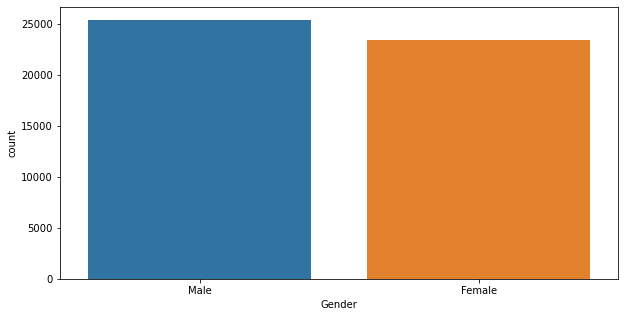

In [101]:
fig = plt.figure(figsize = [10, 5])
sns.countplot('Gender',data = edu) # Count Plot of Gender

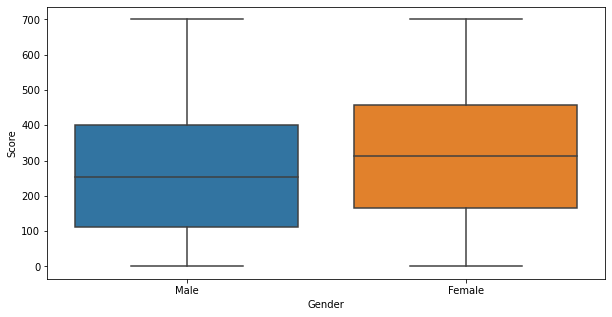

In [102]:
fig = plt.figure(figsize = [10, 5])
sns.boxplot('Gender','Score',data = edu)

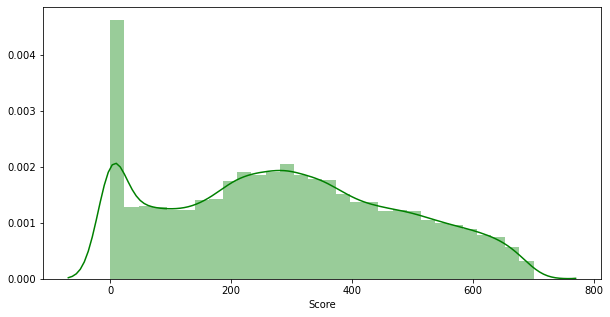

In [103]:
fig = plt.figure(figsize = [10, 5])
sns.distplot(edu['Score'], bins = 30, norm_hist=True, color = "green")

Dataframe-də verilən obyekt kimi ifadə olunan göstəricilər sözlərlə ifadə olunduğuna görə onları analizimizdə istifadə etmək mümkün olmur. Buna görə də onları da ölçülə bilən kateqorik dəyişənlərə çevirmək lazım olacaq. Bunun üçün müvafiq Python kitabxanasından istifadə edərək dəyişənlərin qiymətini ölçülə bilən hala gətirək.

In [104]:
edu = edu.drop("Finkod", axis = 1)

In [105]:
education = pd.get_dummies(edu, drop_first=True)

In [106]:
education.head()

,Score,Native,Math,Gender_Male,Sector_Az_Rus,Is_Entered_Yes
0,56,2,3,1,0,0
1,380,4,4,0,0,1
2,87,0,0,1,0,1
3,266,2,2,1,0,1
4,137,4,3,0,0,1


As we can see from the table above that Native, Math, Gender_Male, Sector_Az_Rus variables are measured around 5 but Score is up to 700. If we leave these variables unchanged then Score variable will affect our prediction model much more than other explainatory variables. Therefore we should scale all the variables to make them equally measurable.

In [107]:
import warnings
warnings.filterwarnings("ignore")
# Extract the columns we'll use for our data
x = education.iloc[:, 1:5].values 
y = education.iloc[:, 5].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x) 
x = scaler.transform(x)

# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [108]:
# Import our model and performance assessement classes from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Logistic Regression

In [109]:
# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, y_train)
logreg_prediction = logreg_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, y_test)))
log_accuracy = 100*accuracy_score(logreg_prediction, y_test)

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(logreg_prediction, y_test))
print(classification_report(logreg_prediction, y_test))

Accuracy 83.26%
[[ 1145   467]
 [ 1981 11029]]
              precision    recall  f1-score   support

           0       0.37      0.71      0.48      1612
           1       0.96      0.85      0.90     13010

    accuracy                           0.83     14622
   macro avg       0.66      0.78      0.69     14622
weighted avg       0.89      0.83      0.85     14622



# KNN Classifier Performance

In [110]:
# Fit (train) the KNN classifier
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, y_train)
knn_prediction = knn_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, y_test)))
knn_accuracy = 100*accuracy_score(knn_prediction, y_test)

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(knn_prediction, y_test))
print(classification_report(knn_prediction, y_test))

Accuracy 79.56%
[[2049 1912]
 [1077 9584]]
              precision    recall  f1-score   support

           0       0.66      0.52      0.58      3961
           1       0.83      0.90      0.87     10661

    accuracy                           0.80     14622
   macro avg       0.74      0.71      0.72     14622
weighted avg       0.79      0.80      0.79     14622



# Decision Tree Classifier

In [111]:
# Create Decision Tree classifer object
decision_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
decision_clf = decision_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = decision_clf.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.835795376829435


In [112]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, y_pred)))
decision_accuracy = 100*accuracy_score(y_test, y_pred)

Accuracy 83.58%


# Support Vector Machine Performance

In [113]:
# Fit (train) the Support Vector Machine classifier
svm_clf = SVC()
svm_model = svm_clf.fit(X_train, y_train)
svm_prediction = svm_clf.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, y_test)))
svm_accuracy = 100*accuracy_score(svm_prediction, y_test)

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(svm_prediction, y_test))

Accuracy 83.44%
[[ 1112   407]
 [ 2014 11089]]


In [114]:
Model_accuracies = {'Log_regression':[log_accuracy],
       'KNN_Classification':[knn_accuracy],
       'Decision_T':[decision_accuracy],
       'Support Vector':[svm_accuracy]}
Accuracies = pd.DataFrame(Model_accuracies)
Accuracies

,Log_regression,KNN_Classification,Decision_T,Support Vector
0,83.258104,79.5582,83.579538,83.442757
